#### 1) Importando todas as bibliotecas necessárias
###### > Pandas e Numpy: manipulação e cleaning de dados estruturados
###### > Scipy: análises estatísticas
###### > Matplotlib.pyplot: plotagem de gráficos
###### > Random: geração de grupos aleatoriamente formados para análises estatísticas 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rm

#### 2) Abrindo o arquivo com os dados brutos (contendo treino e probe test)

In [2]:
arquivo_probe = 'Raw Data (all experiments) - Manipulação.xlsx'
# Depende de qual computador rodar! Há como automatizar isso?

dataframe_original = pd.read_excel(arquivo_probe)
dataframe_manip = dataframe_original.copy() 
dataframe_manip.head(10)


,Test,Animal,Experiment,Stage,Trial,P4_tget_latency_to_first_entry,Distance(m),Path_efficiency,Q1_entries,Q1_time,...,Q4_tget_time,Q4_tget_distance,Q4_tget_latency_to_first_entry,Q4_tget_mean_visit,P4_tget_entries,P4_tget_mean_distance_from,P4_tget_time_getting_closer_to_zone,Q4_Pecent_time,P4_time_getting_closer,Fake_crossings_P1.P2.P3
0,97,10,1,1,2,60.0,31.210,0.004,4,10.2,...,13.4,10.319,3.5,1.2,0,0.481,31.8,22,53,1
1,108,10,1,4,1,60.0,21.965,0.021,5,9.3,...,10.0,3.326,2.6,1.7,0,0.425,26.0,17,43,0
2,17,5,1,1,1,60.0,21.601,0.047,7,26.1,...,6.4,3.528,2.2,1.3,0,0.446,26.9,11,45,2
3,182,21,3,4,2,59.6,20.930,0.021,1,0.3,...,17.3,4.129,15.4,2.5,1,0.382,26.8,29,45,2
4,42,5,1,2,2,60.0,20.900,0.012,5,6.6,...,20.6,5.800,0.0,2.9,0,0.417,32.1,34,54,0
5,96,10,1,1,1,60.0,20.442,0.014,7,12.0,...,19.8,7.144,1.8,2.5,0,0.407,29.0,33,48,1
6,5,2,1,1,1,60.0,19.437,0.056,6,14.3,...,12.2,4.514,0.0,1.7,0,0.448,29.0,20,48,0
7,33,2,1,2,1,60.0,18.382,0.033,5,8.4,...,19.4,6.290,3.6,1.9,0,0.320,26.6,32,44,1
8,296,23,4,5,1,39.1,18.113,0.042,10,14.4,...,26.9,7.976,1.7,1.8,1,0.231,30.5,45,51,1
9,260,24,4,2,2,60.0,18.109,0.033,6,13.7,...,23.9,6.954,0.8,2.7,0,0.340,31.9,40,53,1


#### 2.1) Data Formatting & Cleaning
<p><b>I) Seleção apenas do estágio de Probe Test</b></p>
<p>II) Conversão de dados numéricos em formato de objeto para floats</p>
<p><b>III) O que vamos fazer com valores NaN?</b></p>


In [28]:
#Selecionando apenas os parâmetros para o Probe Test
dataframe_probe = dataframe_manip[dataframe_manip.Stage==5]

#Checando quantos valores NaN nós temos para cada coluna
for coluna in dataframe_probe.columns:
    print(f'\nColuna {coluna}')
    print(dataframe_probe[coluna].isnull().value_counts())
    



Coluna Test
False    39
Name: Test, dtype: int64

Coluna Animal
False    39
Name: Animal, dtype: int64

Coluna Experiment
False    39
Name: Experiment, dtype: int64

Coluna Stage
False    39
Name: Stage, dtype: int64

Coluna Trial
False    39
Name: Trial, dtype: int64

Coluna P4_tget_latency_to_first_entry
False    23
True     16
Name: P4_tget_latency_to_first_entry, dtype: int64

Coluna Distance(m)
False    39
Name: Distance(m), dtype: int64

Coluna Path_efficiency
False    39
Name: Path_efficiency, dtype: int64

Coluna Q1_entries
False    39
Name: Q1_entries, dtype: int64

Coluna Q1_time
False    39
Name: Q1_time, dtype: int64

Coluna Q1_distance
False    39
Name: Q1_distance, dtype: int64

Coluna Q1_mean_visit
False    39
Name: Q1_mean_visit, dtype: int64

Coluna Q2_entries
False    39
Name: Q2_entries, dtype: int64

Coluna Q2_time
False    39
Name: Q2_time, dtype: int64

Coluna Q2_distance
False    39
Name: Q2_distance, dtype: int64

Coluna Q2_mean_visit
False    39
Name: Q2_mean_

#### 3) Passando os dados estrutrados (probe test) para um dicionário


In [4]:
dict_probe = dict(dataframe_probe)
dict_probe.keys()

dict_keys(['Test', 'Animal', 'Experiment', 'Stage', 'Trial', 'P4_tget_latency_to_first_entry', 'Distance(m)', 'Path_efficiency', 'Q1_entries', 'Q1_time', 'Q1_distance', 'Q1_mean_visit', 'Q2_entries', 'Q2_time', 'Q2_distance', 'Q2_mean_visit', 'Q3_entries', 'Q3_time', 'Q3_distance', 'Q3_mean_visit', 'Q4_tget_entries', 'Q4_tget_time', 'Q4_tget_distance', 'Q4_tget_latency_to_first_entry', 'Q4_tget_mean_visit', 'P4_tget_entries', 'P4_tget_mean_distance_from', 'P4_tget_time_getting_closer_to_zone', 'Q4_Pecent_time', 'P4_time_getting_closer', 'Fake_crossings_P1.P2.P3'])

#### 4) Extraíndo cada variável e tornando em vetores (numpy)
##### > Gerando uma lista contendo todas os vetores


In [5]:
distance = np.array(dict_probe['Distance(m)'])
path_eff = np.array(dict_probe['Path_efficiency']) 
q1_entries = np.array(dict_probe['Q1_entries']) 
q1_time = np.array(dict_probe['Q1_time']) 
q1_distance = np.array(dict_probe['Q1_distance']) 
q1_mean_visit = np.array(dict_probe['Q1_mean_visit']) 
q2_entries = np.array(dict_probe['Q2_entries']) 
q2_time = np.array(dict_probe['Q2_time'])
q2_distance = np.array(dict_probe['Q2_distance']) 
q2_mean_visit = np.array(dict_probe['Q2_mean_visit']) 
q3_entries = np.array(dict_probe['Q3_entries']) 
q3_time = np.array(dict_probe['Q3_time'])
q3_distance = np.array(dict_probe['Q3_distance']) 
q3_mean_visit = np.array(dict_probe['Q3_mean_visit']) 
q4_target_entries = np.array(dict_probe['Q4_tget_entries']) 
q4_target_time = np.array(dict_probe['Q4_tget_time']) 
q4_target_distance = np.array(dict_probe['Q4_tget_distance']) 
q4_target_latency_first_entry = np.array(dict_probe['Q4_tget_latency_to_first_entry']) 
q4_target_mean_visit = np.array(dict_probe['Q4_tget_mean_visit']) 
q4_target_percent_time = np.array(dict_probe['Q4_Pecent_time'])
p4_target_latency_first_entry = np.array(dict_probe['P4_tget_latency_to_first_entry']) #MUITOS VALORES NaN! FALAR COM OLAVO!
p4_target_entries = np.array(dict_probe['P4_tget_entries']) 
p4_target_mean_distance_from = np.array(dict_probe['P4_tget_mean_distance_from']) 
p4_target_time_closer_zone = np.array(dict_probe['P4_tget_time_getting_closer_to_zone'])  
p4_target_time_getting_closer = np.array(dict_probe['P4_time_getting_closer']) 
fake_crossings = np.array(dict_probe['Fake_crossings_P1.P2.P3'])

lista_vetores = [distance, path_eff, q1_entries, q1_time, q1_distance, q1_mean_visit, q2_entries, q2_time, q2_distance, q2_mean_visit, q3_entries, q3_time, q3_distance, q3_mean_visit, q4_target_entries, q4_target_time, q4_target_distance, q4_target_latency_first_entry, q4_target_mean_visit, q4_target_percent_time, p4_target_latency_first_entry, p4_target_entries, p4_target_mean_distance_from, p4_target_time_closer_zone, p4_target_time_getting_closer, fake_crossings]
lista_nomes_vetores = ['Distance(m)', 'Path_efficiency', 'Q1_entries', 'Q1_time', 'Q1_distance', 'Q1_mean_visit', 'Q2_entries', 'Q2_time', 'Q2_distance', 'Q2_mean_visit', 'Q3_entries', 'Q3_time', 'Q3_distance', 'Q3_mean_visit', 'Q4_tget_entries', 'Q4_tget_time', 'Q4_tget_distance', 'Q4_tget_latency_to_first_entry', 'Q4_tget_mean_visit', 'Q4_Pecent_time', 'P4_tget_latency_to_first_entry', 'P4_tget_entries', 'P4_tget_mean_distance_from', 'P4_tget_time_getting_closer_to_zone', 'P4_time_getting_closer', 'Fake_crossings_P1.P2.P3']

#### 5) Função para geração de grupos aleatórios (n = 10 animais por grupo)


In [7]:
def grupos_aleat(vetor):
    grupo_1 = rm.choices(vetor, k = 10)
    grupo_2 = rm.choices(vetor, k = 10)
    return [grupo_1, grupo_2]
    #RETORNA UMA LISTA! UTILIZAR A INDEXAÇÃO PARA ANÁISES ESTATÍSTICAS!


#### 6) Geração dos grupos aleatórios repetidas vezes para cada parâmetro

In [8]:
contador_1 = 0
while contador_1 < len(lista_vetores):
    contador_2 = 0
    while contador_2 < 20:  #DEFINIR AQUI QUANTAS VEZES OS GRUPOS DEVEM SER GERADOS (PARA CADA PARÂMETRO)!     
        grupos = grupos_aleat(lista_vetores[contador_1])
        # print("Parâmetro: ", lista_nomes_vetores[contador_1], ", Rodada: ", contador_2 + 1)
        # print("Grupo A:", grupos[0])
        # print("Grupo B: ", grupos[1], "\n")
        contador_2 += 1
    contador_1 += 1
    # print("______________________________________________________________________________________________________\n")

#### 7) Testes T de Student

In [47]:
#IMPORTANDO MÉTODO DE TESTE T (STUDENT) DA BIBLIOTECA SCIPY.STATS
from scipy.stats import ttest_ind

#FUNÇÃO DE STUDENT´S TEST T
def teste_t_Stud(grupoA, grupoB, Alpha):
    stat, p = ttest_ind(grupoA, grupoB)
    '''
    print('t = %.3f, p = %.3f' %(stat, p))
    if p > Alpha:
        print("Distribuições não divergem significativamente (não rejeita a hipótese nula)")
    else:
        print("Distribuições divergem significativamente (rejeita a hipótese nula)")
    '''   
    return p
    
lista_vetores_ttest = [q4_target_entries, p4_target_entries, q1_time, q2_time, q3_time, q4_target_time]
lista_nomes_vetores_ttest = ['Q4_tget_entries', 'P4_tget_entries', 'Q1_time', 'Q2_time', 'Q3_time', 'Q4_tget_time']

#DEFININDO VALOR DE ALPHA E NÚMERO DE RODADAS!
alpha = 0.05
N_rodadas = np.array(list(range(1,1001)))

#CRIANDO DICIONÁRIOS EM QUE CADA PARÂMETRO É UMA VARIÁVEL E RECEBERÁ UMA LISTA DE VALORES DE P (TOTAL E SIGNIFICATIVOS)
p_valores_ttest = dict()
p_valores_ttest_sig = dict()
p_valores_ttest["Rodada"] = N_rodadas  #TOTAL
p_valores_ttest_sig["Rodada"] = N_rodadas  #SIGNIFICATIVOS

for parametro in lista_nomes_vetores_ttest:
    p_valores_ttest[parametro] = [] 
    p_valores_ttest_sig[parametro] = []

#LOOP PARA FAZER N COMPARAÇÕES DESEJADAS PARA CADA PARÂMETRO, SALVANDO OS VALORES DE P GERADOS EM CADA PARÂMETRO DO DICIONÁRIO P_VALORES_TTEST
contador_1 = 0
while contador_1 < len(lista_vetores_ttest):
    contador_2 = 0
    while contador_2 < 1000:  #DEFINIR AQUI QUANTAS VEZES OS GRUPOS DEVEM SER GERADOS (PARA CADA PARÂMETRO)!     
        grupos = grupos_aleat(lista_vetores_ttest[contador_1])
        valor_p = teste_t_Stud(grupos[0], grupos[1], alpha)
        if valor_p < alpha:
            p_valores_ttest_sig[lista_nomes_vetores_ttest[contador_1]].append(valor_p)
        p_valores_ttest[lista_nomes_vetores_ttest[contador_1]].append(valor_p) 
        contador_2 += 1
    '''
    print("\nVariável: ", lista_nomes_vetores_ttest[contador_1], "\n", p_valores_ttest[lista_nomes_vetores_ttest[contador_1]])
    '''
    contador_1 += 1
    
#CRIA DICIONÁRIOS CÓPIAS PARA MANIPULAÇÃO E VISUALIZAÇÃO DOS VALORES DE P
p_valores_ttest_MANIP = p_valores_ttest.copy()
p_valores_ttest_sig_MANIP = p_valores_ttest_sig.copy()
for parametro_dicionario in p_valores_ttest_MANIP:
    p_valores_ttest_MANIP[parametro_dicionario] = np.array(p_valores_ttest_MANIP[parametro_dicionario])
    p_valores_ttest_sig_MANIP[parametro_dicionario] = np.array(p_valores_ttest_sig_MANIP[parametro_dicionario])

'''
    print(p_valores_ttest_sig_MANIP.keys())     
    print(p_valores_ttest_sig_MANIP.values())    
    print(valores_p_significativos)
    print("\n>>> Das 1000 comparações, ", len(valores_p_significativos), "obtiveram valor de p < 0.05 (para alpha = 0.05)")
'''

'\n    print(p_valores_ttest_sig_MANIP.keys())     \n    print(p_valores_ttest_sig_MANIP.values())    \n    print(valores_p_significativos)\n    print("\n>>> Das 1000 comparações, ", len(valores_p_significativos), "obtiveram valor de p < 0.05 (para alpha = 0.05)")\n'

#### 8) Visualização provisória dos Dados (parâmetros comparados com Student´s T Tests): Bliblioteca Seaborn!
##### > Parâmetros: Q4_tget_entries, P4_tget_entries, Q1_time, Q2_time, Q3_time, Q4_tget_time

 >>> Variável Q4_tget_entries: 43 resultados de p < 0.05 dos 1000 testes realizados



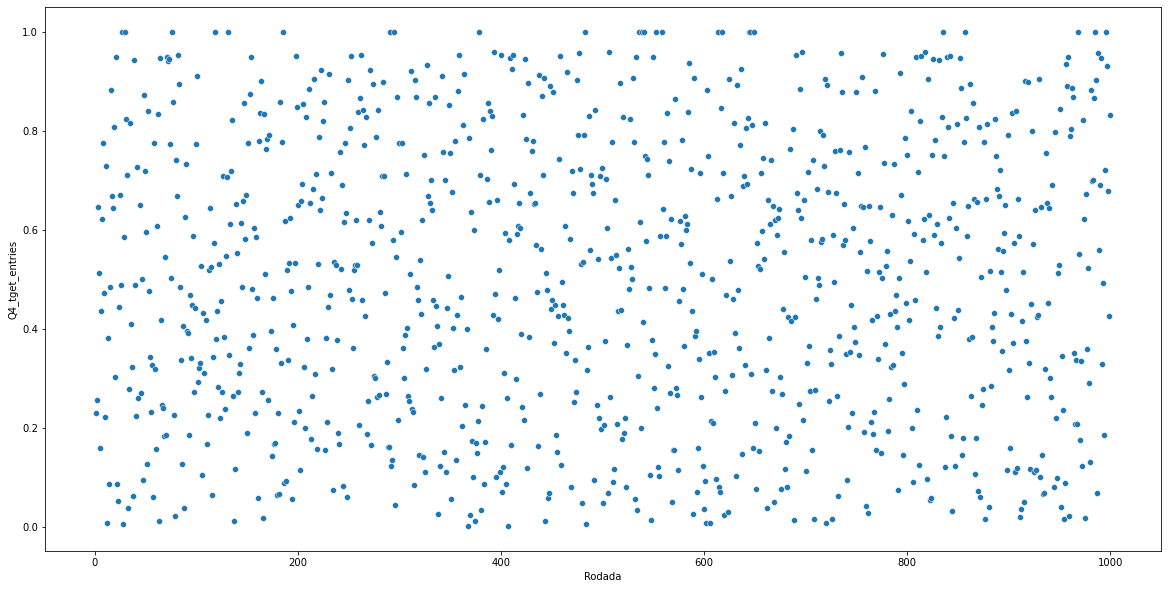

In [48]:
#TRANSFORMAR TUDO EM DATAFRAME PARA RODAR A BIBLIOTECA SEABORN!
dataframe_ttest = pd.DataFrame(p_valores_ttest_MANIP)

f, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = "Rodada", y = "Q4_tget_entries", data = dataframe_ttest)

print(f' >>> Variável {"Q4_tget_entries"}: {len(p_valores_ttest_sig_MANIP["Q4_tget_entries"])} resultados de p < 0.05 dos 1000 testes realizados\n')
# dataframe_ttest.head(10)

 >>> Variável Q4_tget_time: 45 resultados de p < 0.05 dos 1000 testes realizados



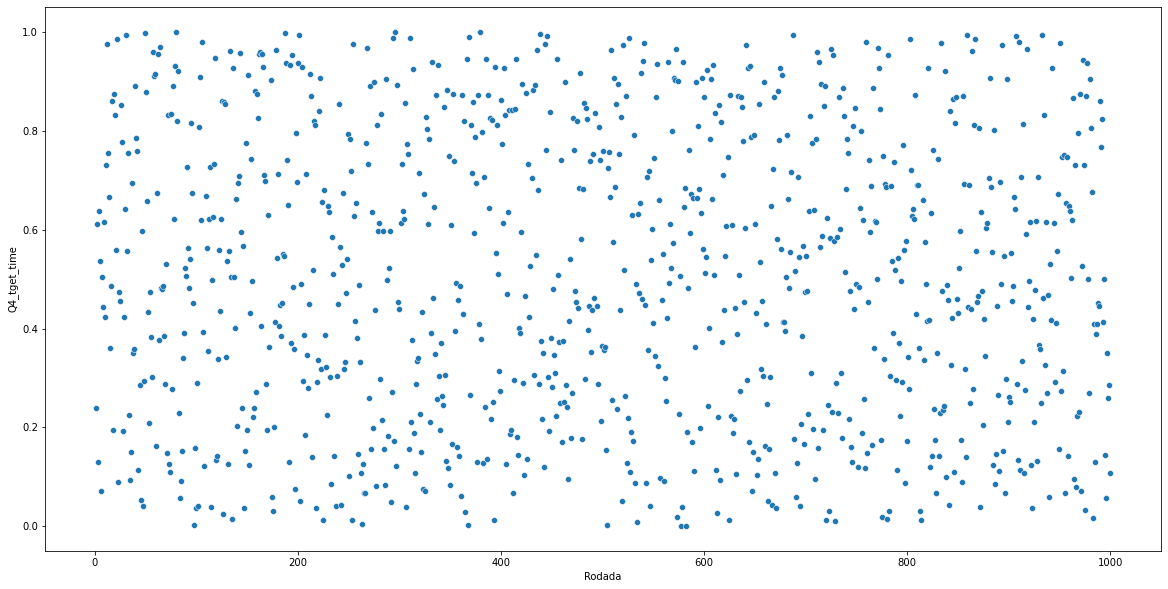

In [49]:
f, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = "Rodada", y = "Q4_tget_time", data = dataframe_ttest)

print(f' >>> Variável {"Q4_tget_time"}: {len(p_valores_ttest_sig_MANIP["Q4_tget_time"])} resultados de p < 0.05 dos 1000 testes realizados\n')



 >>> Variável Q3_time: 51 resultados de p < 0.05 dos 1000 testes realizados



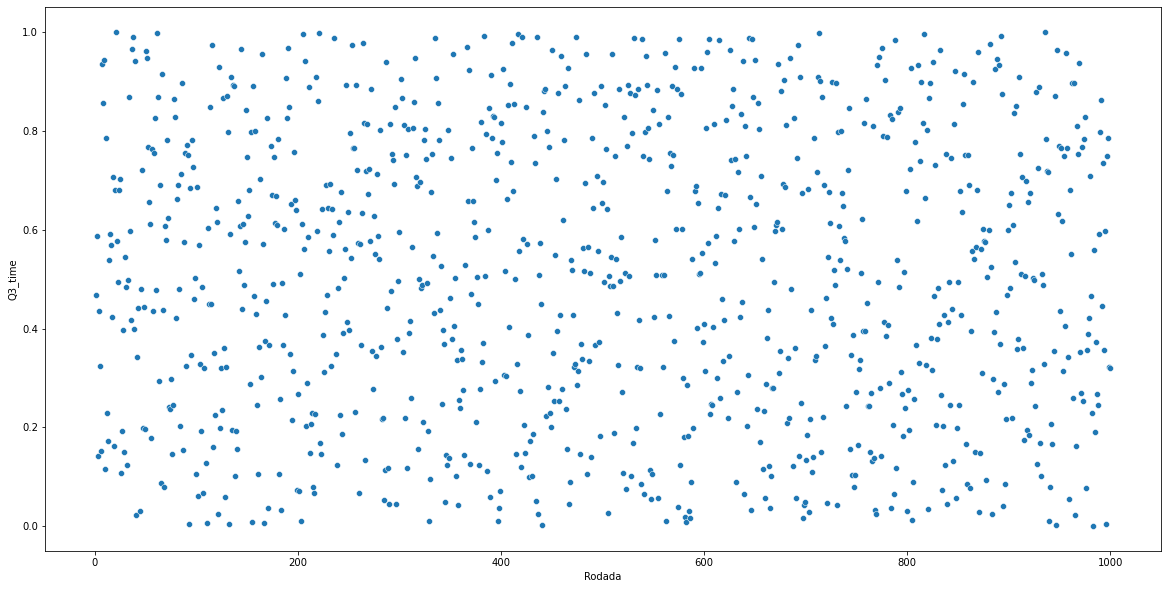

In [50]:
f, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = "Rodada", y = "Q3_time", data = dataframe_ttest)

print(f' >>> Variável {"Q3_time"}: {len(p_valores_ttest_sig_MANIP["Q3_time"])} resultados de p < 0.05 dos 1000 testes realizados\n')


 >>> Variável Q2_time: 51 resultados de p < 0.05 dos 1000 testes realizados



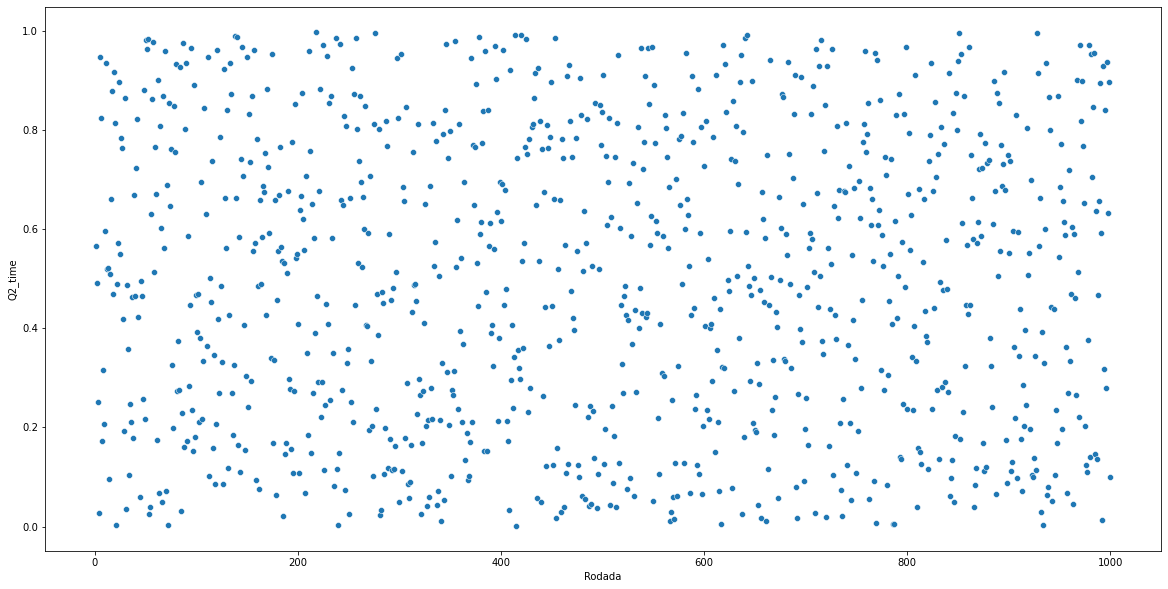

In [51]:
f, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = "Rodada", y = "Q2_time", data = dataframe_ttest)

print(f' >>> Variável {"Q2_time"}: {len(p_valores_ttest_sig_MANIP["Q2_time"])} resultados de p < 0.05 dos 1000 testes realizados\n')


 >>> Variável Q1_time: 49 resultados de p < 0.05 dos 1000 testes realizados



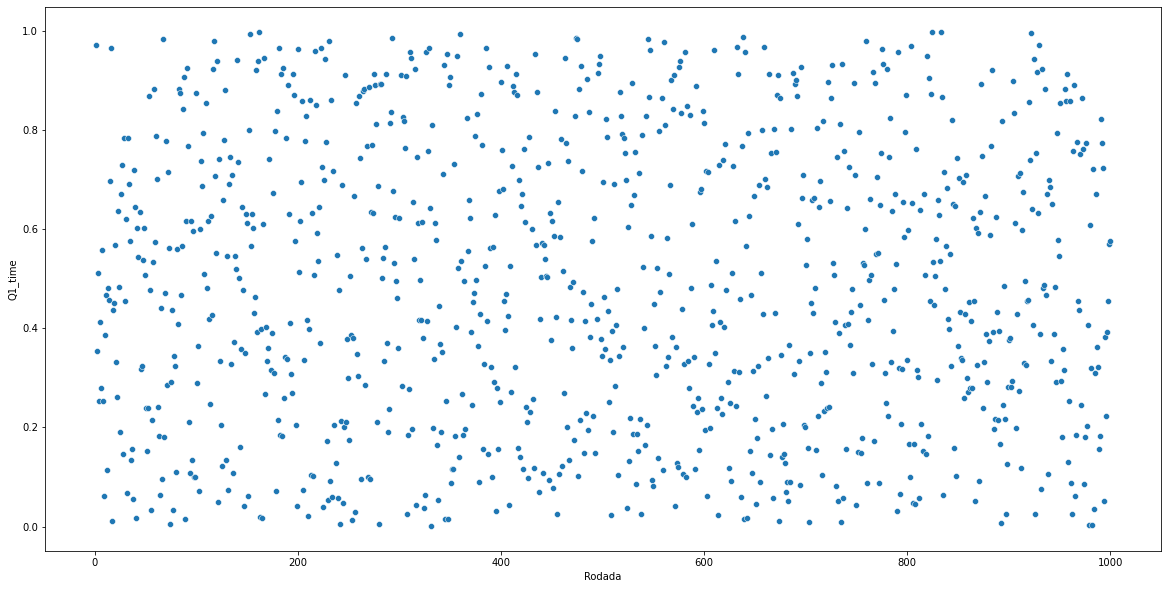

In [52]:
f, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = "Rodada", y = "Q1_time", data = dataframe_ttest)

print(f' >>> Variável {"Q1_time"}: {len(p_valores_ttest_sig_MANIP["Q1_time"])} resultados de p < 0.05 dos 1000 testes realizados\n')


 >>> Variável P4_tget_entries: 57 resultados de p < 0.05 dos 1000 testes realizados



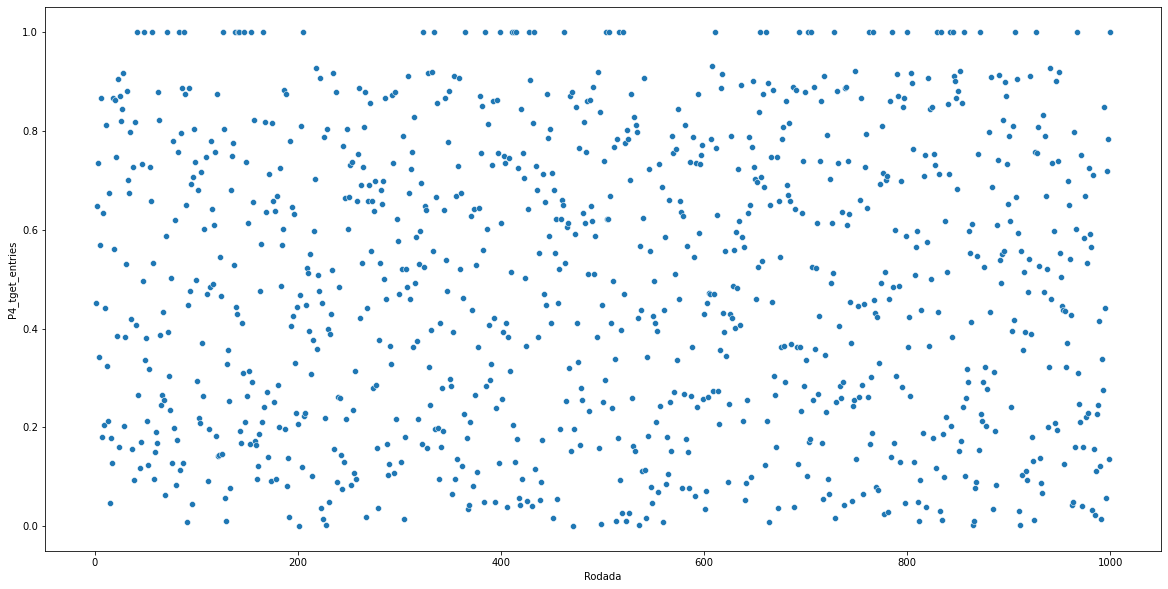

In [53]:
f, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = "Rodada", y = "P4_tget_entries", data = dataframe_ttest)

print(f' >>> Variável {"P4_tget_entries"}: {len(p_valores_ttest_sig_MANIP["P4_tget_entries"])} resultados de p < 0.05 dos 1000 testes realizados\n')

#############################################################################################################################

# Versão antiga (parte de análise estatística)

In [ ]:
lista_maior_x = []
lista_maior_y = []
contador = 0
for etapa in range(1000):
    lista_maior_x.append(choices(lista_q1_entries, k = 1))
    lista_maior_y.append(choices(lista_q1_entries, k = 1))
    contador += 1
# print(lista_maior_x)
# print(lista_maior_y)
contador_2 = 0
contador_pval = 0
while contador_2 < len(lista_maior_x):
    sat, p_val = tt(lista_maior_x[contador_2][0], lista_maior_y[contador_2][0])
    # print(sat, p_val)
    if p_val < 0.05:
        print(f'Teste de número {contador_2} - pvalue = {p_val}')
        contador_pval += 1
        print(f'''Grupo 1 (valores): {lista_maior_x[contador_2][0]}''')
        print(f'Média do grupo 1: {np.mean(lista_maior_x[contador_2][0])}')
        print(f'''Grupo 2 (valores): {lista_maior_y[contador_2][0]}''')
        print(f'Média do grupo 1: {np.mean(lista_maior_y[contador_2][0])} \n')
        grupos_grafico = np.array(['Grupo 1', 'Grupo 2'])
        medias = [np.mean(lista_maior_x[contador_2][0]), np.mean(lista_maior_y[contador_2][0])]
        plt.bar(grupos_grafico, medias, color = 'red')
        plt.show()
        print('\n'*2)
    contador_2 += 1 
print(f'Dos {len(lista_maior_x)} testes realizados, {contador_pval} obtiveram diferença significativa pelo teste T')